### import libraries

In [10]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.image import imread
from skimage.segmentation import (morphological_chan_vese,
                                  checkerboard_level_set)

In [2]:
folder = "/Users/cdesio/UoB/DARK-LANA/Dark/Field_5x5/"

In [3]:
fnames = os.listdir(folder)

In [8]:
img = imread(os.path.join(folder, fnames[0]))

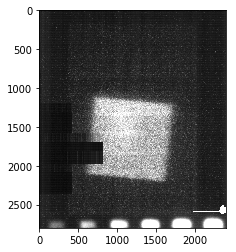

In [9]:
plt.imshow(img, cmap='gray')

### calculate profile

In [21]:
init_ls =  checkerboard_level_set(img.shape, 5)
ls = morphological_chan_vese(img, 20, init_level_set=init_ls)#, smoothing=5)

In [29]:
def show_img_cont(image,ls):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(image, cmap="gray")
    #ax.set_axis_off()
    ax.contour(ls,[0.5], colors='r')
    #ax.set_title("Morphological ACWE segmentation", fontsize=12)
    plt.show()
    return

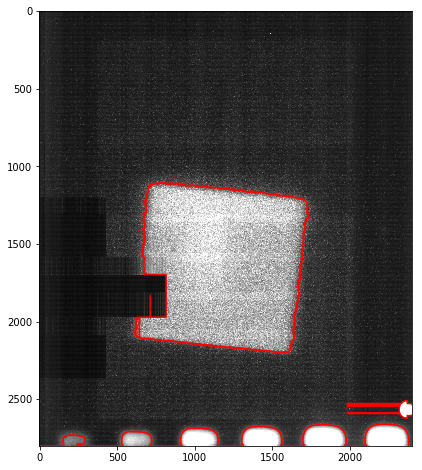

In [30]:
show_img_cont(img, ls)

In [24]:
contour = [np.nonzero(ls)[0], np.nonzero(ls)[1]]

### plot profile

(2800, 0)

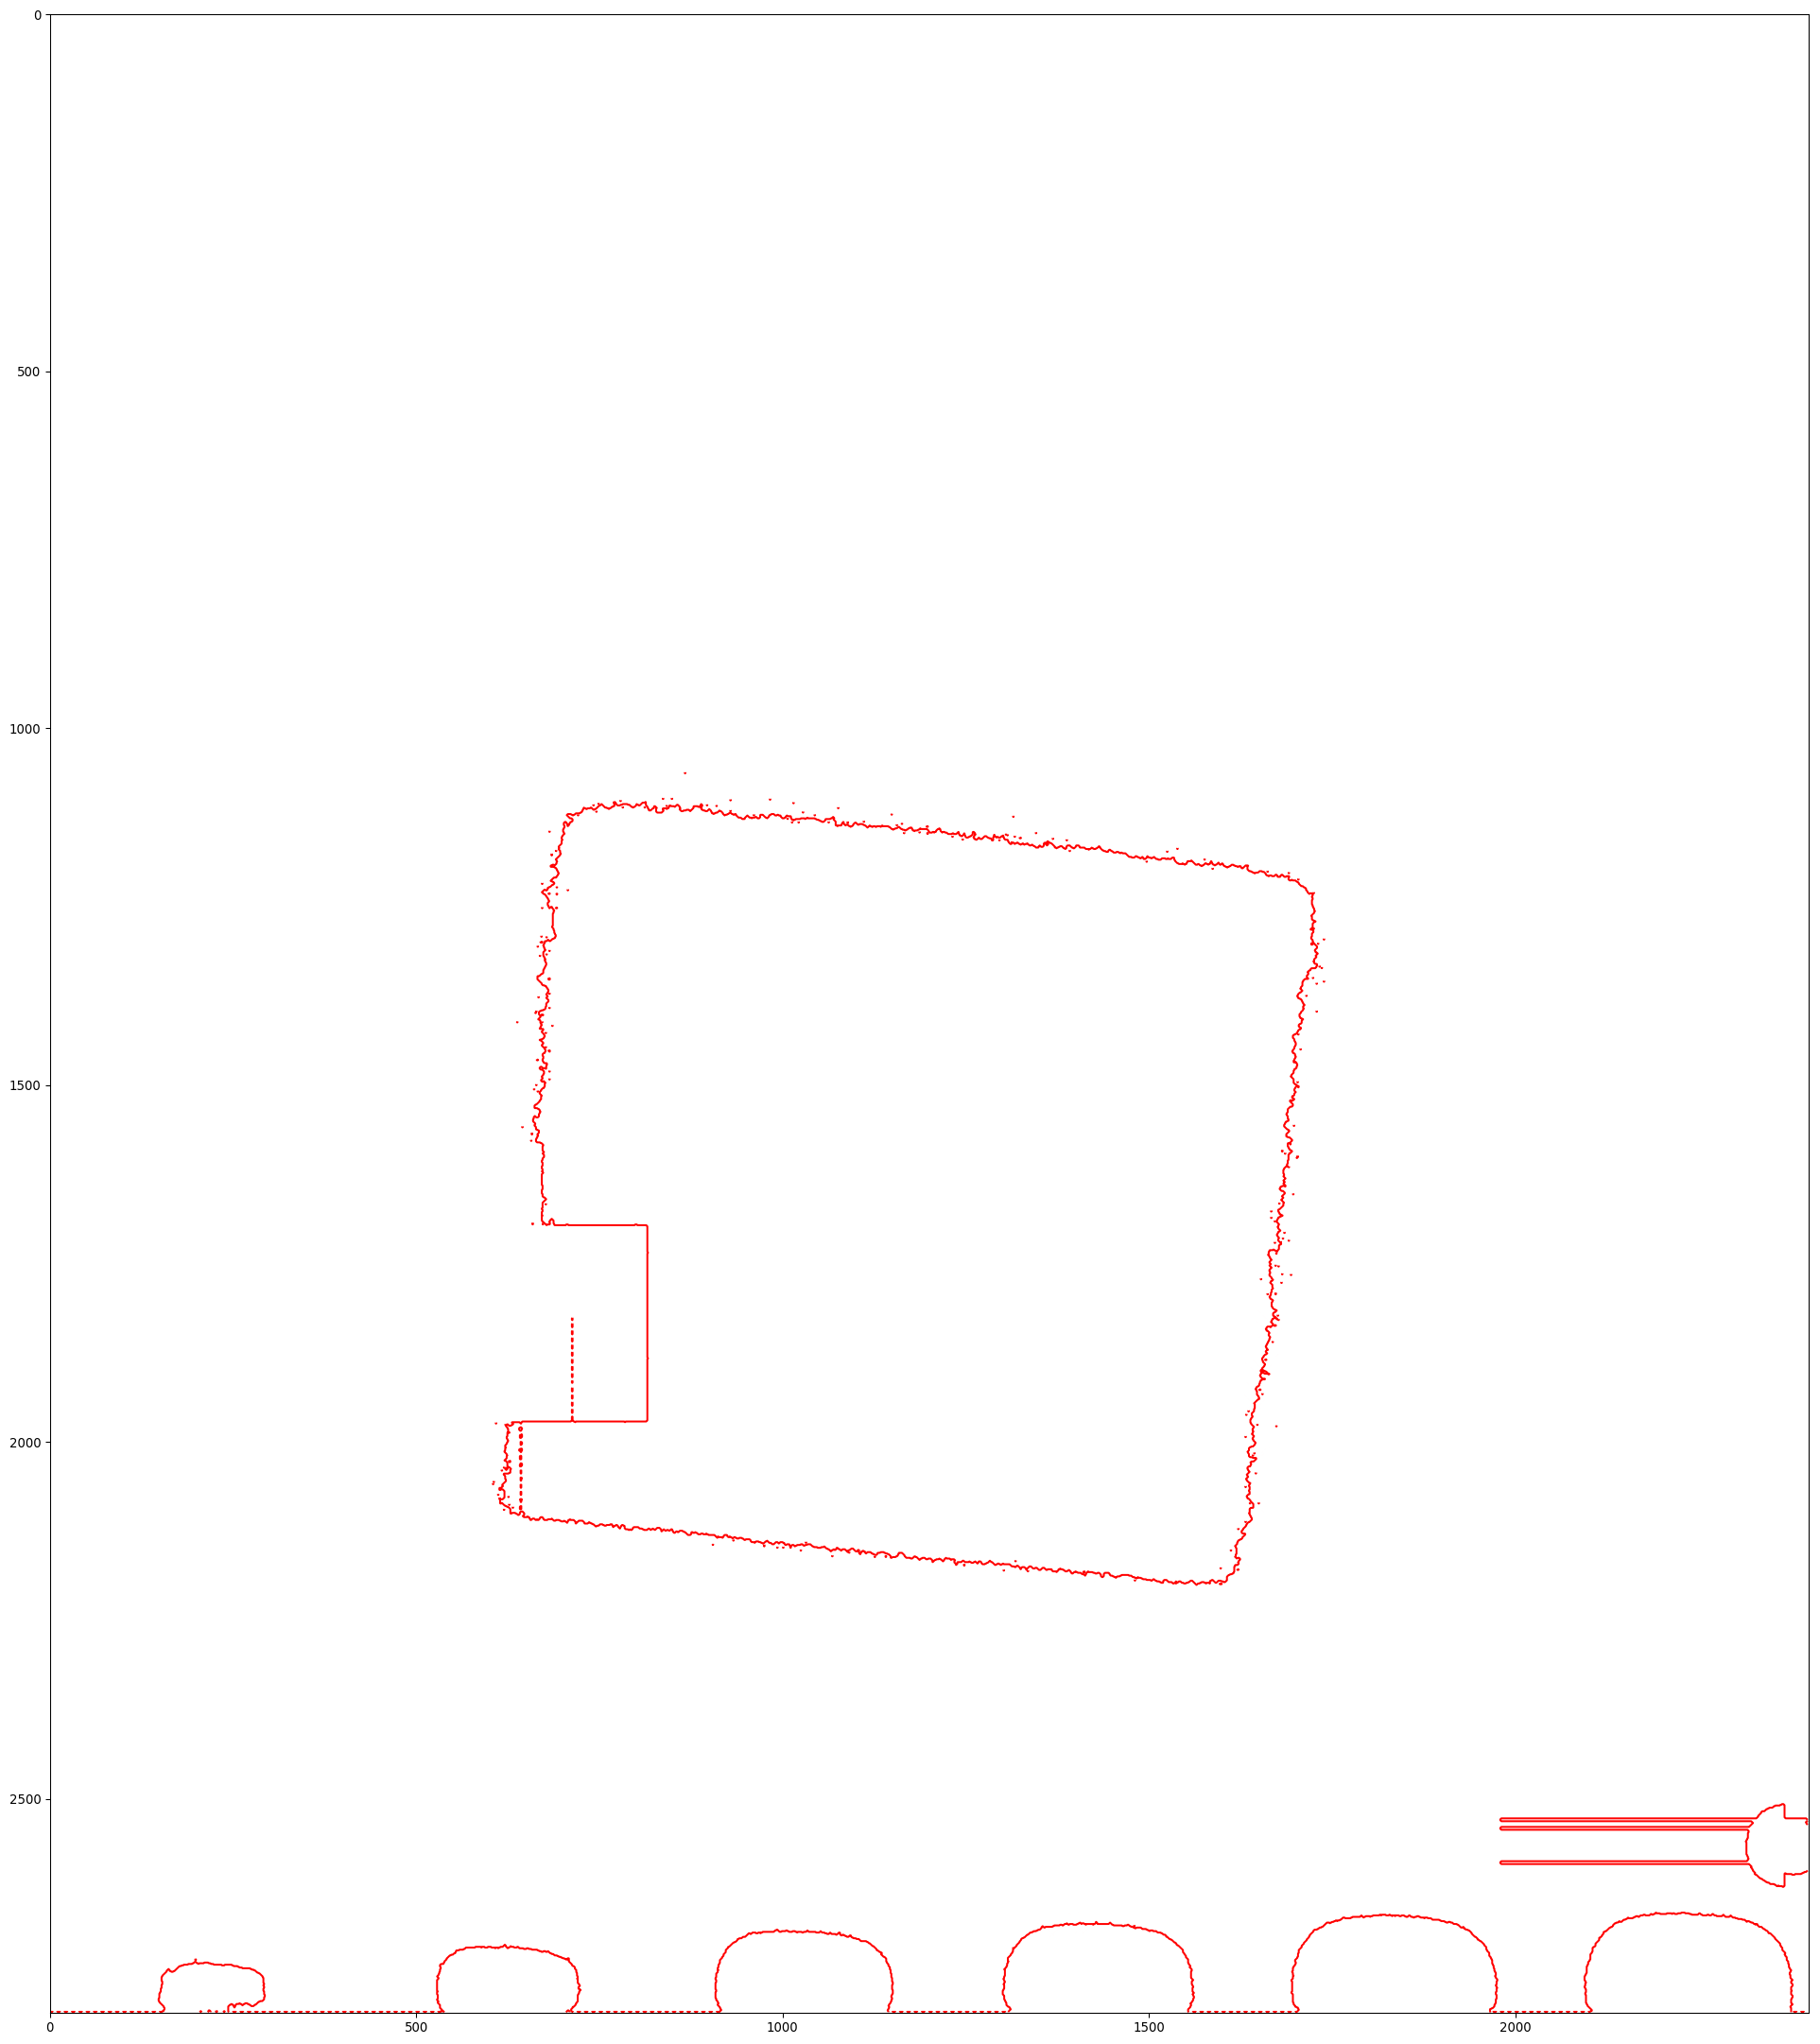

In [41]:
plt.figure(figsize=(2400/96, 2800/96), dpi=96)
plt.contour(ls,[0.5],colors='r')
plt.xlim(0,2400)
plt.ylim(2800,0)

### select lower part

(300, 0)

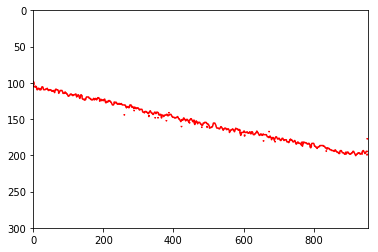

In [182]:
#plt.figure(figsize=(2400/96, 2800/96), dpi=96)
plt.contour(ls[2000:2400,645:1600],[0.5],colors='r')
plt.xlim(0,1600-645)
plt.ylim(300,0)

In [55]:
from sklearn.linear_model import LinearRegression

In [183]:
cut = ls[2000:2400,645:1600]

In [186]:
np.max(np.where(cut)[1])

954

### select profile of lower part (it was a binary mask) 

In [187]:
cut = ls[2000:2400,645:1600]
max_cut = np.max(np.where(cut)[1])
x = list()
y=list()
for i in range(max_cut):
    if np.any(np.where(cut)[1][np.where(cut)[1]==i]):
        x.append(i)
        y.append(np.max(np.where(cut)[0][np.where(cut)[1]==i]))

(300, 0)

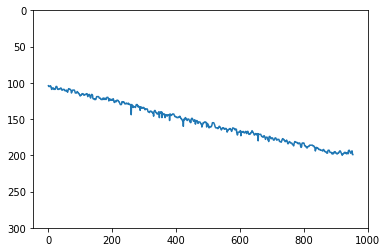

In [188]:
plt.plot(x,y)
plt.ylim(300,0)

### fit to straight line

In [189]:
x =np.asarray(x).reshape(-1,1)

In [190]:
model = LinearRegression()

model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)



coefficient of determination: 0.993786895952494
intercept: 105.26189300484097
slope: [0.10155377]


### plot profile, fitted line and horizontal line for comparison

In [212]:
1600-645

955

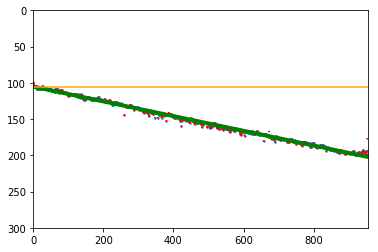

In [226]:
x1 = range(955)

y1 = model.coef_ * x1 + model.intercept_

plt.contour(cut,[0.5],colors='r')
plt.xlim(0,1600-645)
plt.ylim(300,0)
plt.scatter(x,y, s=2)
plt.plot(x1,y1, c='green', lw=4)
plt.plot(range(955), np.ones(shape=955)*model.intercept_, c='orange')



### calculate slope and angle

In [209]:
np.arctan?

In [202]:
slope=model.coef_[0]

In [203]:
np.rad2deg(np.arctan(slope))

5.798722748633023

In [204]:
slope

0.10155377362095325

In [210]:
np.arctan(slope)

0.10120680437394176

### select upper part

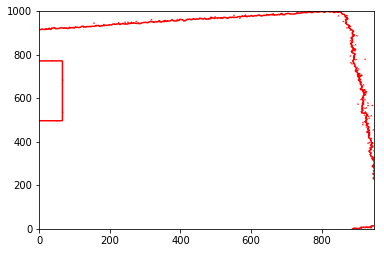

In [249]:
plt.contour(ls[1200:2200,750:1700],[0.5],colors='r')
#plt.xlim(0,1700-750)
#plt.ylim(300,0)

In [239]:
cut_up = ls[1000:2400,750:1700]

In [240]:
np.max(np.where(cut_up)[1])

949

In [241]:
x_up = list()
y_up =list()
for i in range(949):
    if np.any(np.where(cut_up)[1][np.where(cut_up)[1]==i]):
        x_up.append(i)
        y_up.append(np.max(np.where(cut_up)[0][np.where(cut_up)[1]==i]))


KeyboardInterrupt: 

In [ ]:
plt.plot(x_up,y_up)
plt.ylim(300,0)